In [2]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [3]:
height, width = 3, 3
maze = np.array(np.random.randint(0, 10, size = (height, width)))


In [ ]:
'''Ant colony optimisation. The choice of the cell to move to will depend on the distance between cells (attractivity) and pheromone level. Ants only decide on cells that are reachable. This gives a probability of moving from one cell to each neighbouring cell. And based on this the agent can sample and select one.
Each cell has a probability of the ant transitioning to it and it needs to randomly select which one it goes to using a  weighted random.choice = doesn't have to be the optimal path, just a path using ant colony'''

In [ ]:
'''It should be stressed that the Ant Colony Optimization has been constructed to seek solutions of NP-hardproblems. As such, there is thus no guarantee that the most optimumsolution will be always found. Therefore, the obtained results may be bothoptimal (accurate) and approximations that depend on the degree of fitnessof the algorithm itself for each individual problem to be solved.
Thanks to a construction ofthe shortest path tree it is not necessary to find the shortest paths from thesource to all of the nodes one by one, but only to such nodes that have notyet been included in the tree.

The number of ants influences considerably the accuracy of a solution obtained as a result of the operation of the algorithm. At the same time, it increases time of its operation.

Ant  colony  optimization  is  an  iterative  algorithm.  At  eachiteration,  a  number  of  artificial  ants  are  considered.  Each  ofthem builds a solution by walking from vertex to vertex on thegraph with the constraint of not visiting any vertex that she hasalready  visited  in  her  walk.  At  each  step  of  the  solution  con-struction,  an  ant  selects  the  following  vertex  to  be  visitedaccording  to  a  stochastic  mechanism  that  is  biased  by  thepheromone: when in vertex i, the following vertex is selectedstochastically  among  the  previously  unvisited  ones  (see  Figure2). In particular, if jhas not been previously visited, it can beselected with a probability that is proportional to thepheromone associated with edge (i,j).

VERTICES ARE NODES, EDGES ARE TIME VALUES/DISTANCE BETWEEN NODES, COORDINATES OF CELLS ARE NODES
MEW REPRESENTS ATTRACTIVENESS OF A CELL WHICH IS 1/TIMEVALUES SO 1/MAZE
'''

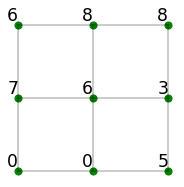

In [4]:
nodes_array, nodes_maze, connectivity  = plot_nodes(annotate=True, chosen_path=True)

In [32]:
maze

array([[6, 8, 8],
       [7, 6, 3],
       [0, 0, 5]])

In [9]:
maze[0][2] # edge between vertex 0,1 and 0,2, 1,2 and 0, 2

8

In [186]:
def fill_initial_pheromones(Lij): # creates a 2D pheromone array where Lij is the original maze with time values. This sets the pheromones to be equal to the attractiveness/desirability of the vertex
    pheromones = 1/Lij
    pheromones[pheromones==1] = 0.75 
    pheromones[pheromones>1] = 0.9999 # 1/0 becomes infinity so we replace these with 1s and to scale it, if a cell has distance 1 then it has 0.75
    return pheromones

In [187]:
pheromones = fill_initial_pheromones(maze) # initial pheromone concentration resembles the attractivity of each cell, use this for attractiveness and use nodes for distances
move_attractiveness = fill_initial_pheromones(maze)

In [188]:
pheromones

array([[0.16666667, 0.125     , 0.125     ],
       [0.14285714, 0.16666667, 0.33333333],
       [0.9999    , 0.9999    , 0.2       ]])

In [189]:
move_attractiveness

array([[0.16666667, 0.125     , 0.125     ],
       [0.14285714, 0.16666667, 0.33333333],
       [0.9999    , 0.9999    , 0.2       ]])

In [190]:
nodes_maze

[array([[0. , 3. ],
        [1.5, 3. ],
        [3. , 3. ]]),
 array([[0. , 1.5],
        [1.5, 1.5],
        [3. , 1.5]]),
 array([[0. , 0. ],
        [1.5, 0. ],
        [3. , 0. ]])]

In [23]:
nodes_maze[1][1]

array([1.5, 1.5])

In [205]:
def get_neighbours(maze, current_ant_loc): # returns a list of accessible nodes to the ant, THIS VERSION USES maze with nodes as vertices
    neighbours = [] # contains the up, down, left, right accessible nodes for the ants
   #if current_node_location contains 0 or positive numbers then append to neighbours else append None?
    if current_ant_loc[0]-1 >= 0:
        neighbours.append(maze[current_ant_loc[0]-1][current_ant_loc[1]])
    else: neighbours.append(np.NaN)
    if current_ant_loc[0]+1 <= height-1:
        neighbours.append(maze[current_ant_loc[0]+1][current_ant_loc[1]])
    else: neighbours.append(np.NaN)
    if current_ant_loc[1]-1 >= 0:
        neighbours.append(maze[current_ant_loc[0]][current_ant_loc[1]-1])
    else: neighbours.append(np.NaN)
    if current_ant_loc[1]+1 <= width-1:
        neighbours.append(maze[current_ant_loc[0]][current_ant_loc[1]+1])
    else: neighbours.append(np.NaN)
    return neighbours
neighbours = np.array(get_neighbours(maze, [0, 0]))
neighbours

array([nan,  7., nan,  8.])

In [226]:
def determine_Pij_neighbours():
    alpha, beta = 1.0, 2.0
    pheromone_neighbours = np.array(get_neighbours(pheromones, [0,0]))
    attractiveness_neighbours = np.array(get_neighbours(move_attractiveness, [0,0]))
    pheromone_times_attractiveness = np.multiply( np.power(pheromone_neighbours, alpha), np.power(attractiveness_neighbours, beta ))
    np.nan_to_num(pheromone_times_attractiveness,copy=False, nan=0) # makes the probability of inaccessible nodes 0
    sum_pheromone_times_attractiveness = np.sum(pheromone_times_attractiveness)
    return pheromone_times_attractiveness/sum_pheromone_times_attractiveness # gives probabilities of choosing a cell to move to

In [227]:
determine_Pij_neighbours()

array([0.        , 0.59883041, 0.        , 0.40116959])

In [ ]:
def choose_neighbours(Pij): #takes an input of the array of probabilities
    ''' In ACS, the choice of the next node to visit is based on random choice but with the priority of better Pij values for this reason transition probability calculation is changed a bit to get value in the range 0-100%.'''
    
    return 

In [ ]:
while curr_position != [height-1, width-1]:
    #find path
    

In [ ]:
def get_neighbours_coords(maze, current_ant_loc): # returns a list of accessible cells to the ant, THIS VERSION USES maze with time values and their coordinates in the 2D array as vertices - NEEDED FOR GRAPH
    neighbours_coords = [] # contains the up, down, left, right accessible nodes for the ants
   #if current_node_location contains 0 or positive numbers then append to neighbours else append None?
    if current_ant_loc[0]-1 >= 0:
        neighbours_coords.append([current_ant_loc[0]-1, current_ant_loc[1]])
    else: neighbours_coords.append(np.NaN)
    if current_ant_loc[0]+1 <= height-1:
        neighbours_coords.append([current_ant_loc[0]+1, current_ant_loc[1]])
    else: neighbours_coords.append(np.NaN)
    if current_ant_loc[1]-1 >= 0:
        neighbours_coords.append([current_ant_loc[0], current_ant_loc[1]-1])
    else: neighbours_coords.append(np.NaN)
    if current_ant_loc[1]+1 <= width-1:
        neighbours_coords.append([current_ant_loc[0], current_ant_loc[1]+1])
    else: neighbours_coords.append(np.NaN)
    return neighbours_coords
neighbours_coords = get_neighbours_coords(maze, [0, 0])
neighbours_coords

## NODE PLOT 

In [ ]:
def plot_maze_path(annotate=True, chosen_path=True): 
        c1 = np.array([0, width])
        c2 = np.array([height, 0]) 
        dim = len(c1) 
        x_pts = np.linspace(c1[0], c2[0], width)
        y_pts = np.linspace(c1[1], c2[1], height)
        Xv, Yv = np.meshgrid(x_pts, y_pts)
        numpts = width*height      
        node_array = np.zeros((numpts, 2), dtype=float)
        node_array[:,0] = np.reshape(Xv, numpts)
        node_array[:,1] = np.reshape(Yv, numpts)
        num_cells = int(width-1)*(height-1)
        connectivity = np.zeros((num_cells, int(2**dim)), dtype=int)
        rows, cols = height-1, width-1 
        for row in range(rows):
            for col in range(cols):
                num = width*row + col
                connectivity[cols*row + col] = [num+0, num+1, num+width, num+width+1]

        annotations = maze.flatten()
        X,Y = node_array.T
        fig = plt.figure(figsize=(width,height)) 
        ax = fig.add_subplot(111)
        ax.set_aspect('auto')
        plt.axis('off')
        plt.scatter(X,Y, marker='o', s=50, color='g', alpha=1.0)
        if height == width:
            plt.plot(Xv,Yv, linewidth=2, color='k', alpha=0.2)
            plt.plot(Yv,Xv, linewidth=2, color='k', alpha=0.2)
        if annotate:                    
            for i, pos in enumerate(node_array):
                plt.text(pos[0], pos[1],  str(annotations[i]), color='k', verticalalignment='bottom', horizontalalignment='right', fontsize='xx-large')
            
        nodes_coords = np.split(node_array, height)

        path_coords_grid = []
        for x, y in option_coords[chosen_path]: # this needs to convert a path to coordinates on the graph
            path_coords_grid.append(nodes_coords[x][y])
        head_length = 0.1
        if chosen_path:
            for i in range(len(path_coords_grid)-1): # plots vectors for the shortest path
                dx = path_coords_grid[i+1][0] - path_coords_grid[i][0]
                dy = path_coords_grid[i+1][1] - path_coords_grid[i][1]
                vec_ab = [dx,dy]
                vec_ab_magnitude = np.sqrt(dx**2+dy**2)
                dx = dx / vec_ab_magnitude
                dy = dy / vec_ab_magnitude
                vec_ab_magnitude = vec_ab_magnitude - head_length
                plt.arrow(path_coords_grid[i][0], path_coords_grid[i][1], vec_ab_magnitude*dx, vec_ab_magnitude*dy, head_width=0.1, head_length=0.2, color='red')
        plt.show(block=False)
        return node_array, nodes_coords, connectivity

## NOT USED

In [68]:
def shortest_path_aco(graph, maze, start_node, end_node, n_ants, alpha, beta, rho, tau_min, tau_max, iteration_limit):
    #d = np.ones((height,width), dtype=float)*np.inf
    #pred = np.zeros((height,width), dtype=float)
    #return d, pred
#d, pred = shortest_path_aco(nodes_maze, maze, nodes_maze[0][0], nodes_maze[height-1][width-1], n_ants, alpha, beta, rho, tau_min, tau_max, iteration_limit)

def euclidean(nodes): # use node array/coords for distances
    distance = math.sqrt(pow(nodes[1] - nodes[1], 2) + pow(nodes[0] - nodes[0], 2))
    return distance

In [55]:
euclidean(node_coords[0][0], node_coords[2][2])

4.242640687119285

In [ ]:
fill_initial_pheromones(start_position=(0,0))

In [ ]:
def fill_initial_pheromones(start_position): # creates a 2D phreromone array
    pheromones = np.zeros((height,width), dtype=float)
    Lij = euclidean(node_coords[start_position[0],[0]]) #returns array with distances for each node 
    for i in pheromones:
        for j in i:
            pheromones[j] = 1/Lij
    return pheromones

In [ ]:
'''city_to_city_score = pheromone ** alpha * (1.0 / distance) ** beta
prob_of_going_to_city(i) = city_to_city_score(i) / sum_of_all_available_city_to_city_scores'''